In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os

In [7]:
df = pd.read_csv('/content/partitioned_data/csv/xa.s12.00.mhz.1971-05-12HR00_evid00031.csv')

In [8]:
df

,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s)
0,1971-05-12T00:00:00.712000,0.000000,-6.579815e-16
1,1971-05-12T00:00:00.862943,0.150943,-8.333763e-16
2,1971-05-12T00:00:01.013887,0.301887,-9.389561e-16
3,1971-05-12T00:00:01.164830,0.452830,-9.307208e-16
4,1971-05-12T00:00:01.315774,0.603774,-8.207080e-16
...,...,...,...
572402,1971-05-13T00:00:01.013887,86400.301887,-4.352553e-16
572403,1971-05-13T00:00:01.164830,86400.452830,-6.182356e-16
572404,1971-05-13T00:00:01.315774,86400.603774,-7.570110e-16
572405,1971-05-13T00:00:01.466717,86400.754717,-9.248588e-16


In [10]:
!pip install obspy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.4 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.35
    Uninstalling SQLAlchemy-2.0.35:
      Successfully uninstalled SQLAlchemy-2.0.35
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.54 which is incompatible.


In [1]:
import obspy

In [119]:
cat_file = '/content/partitioned_data/apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)
cat

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19T20:25:00.000000,73500.0,evid00002,impact_mq
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25T03:32:00.000000,12720.0,evid00003,impact_mq
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26T20:17:00.000000,73020.0,evid00004,impact_mq
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25T01:14:00.000000,4440.0,evid00006,impact_mq
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26T14:29:00.000000,52140.0,evid00007,deep_mq
...,...,...,...,...,...
71,xa.s12.00.mhz.1974-10-14HR00_evid00156,1974-10-14T17:43:00.000000,63780.0,evid00156,impact_mq
72,xa.s12.00.mhz.1975-04-12HR00_evid00191,1975-04-12T18:15:00.000000,65700.0,evid00191,impact_mq
73,xa.s12.00.mhz.1975-05-04HR00_evid00192,1975-05-04T10:05:00.000000,36300.0,evid00192,impact_mq
74,xa.s12.00.mhz.1975-06-24HR00_evid00196,1975-06-24T16:03:00.000000,57780.0,evid00196,impact_mq


In [224]:
FILE = 'xa.s12.00.mhz.1973-01-31HR00_evid00091'
FILE_PATH = '/content/partitioned_data/mseed/' + FILE + '.mseed'
ROW_NUM = cat[cat['filename'] == FILE].index[0]

In [225]:
st = obspy.read(FILE_PATH)

In [203]:
st[0].stats

         network: XA
         station: S12
        location: 00
         channel: MHZ
       starttime: 1973-01-31T00:00:00.595000Z
         endtime: 1973-01-31T23:59:59.689340Z
   sampling_rate: 6.625
           delta: 0.1509433962264151
            npts: 572395
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 1136, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 4096, 'filesize': 4653056})

In [240]:
# prompt: using the fft plot in the previous function, find the time stamp corresponding to the largest amplitude of any frequency, and then mark it on the time domain graph

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os
import obspy
from obspy import read
from scipy.fft import fft, fftfreq

def process_mseed_fft(st, filename):
    # ... (Your existing code for time and frequency domain plots) ...
    # Extract the first trace (assuming the file has multiple traces)
    trace = st[0]
    data = trace.data
    sampling_rate = trace.stats.sampling_rate

    # Create a time axis for the time-domain plot
    time = np.linspace(0, len(data) / sampling_rate, num=len(data))

    # FFT of the signal
    N = len(data)
    fft_values = fft(data)
    fft_frequencies = fftfreq(N, 1/sampling_rate)

     # Only plot the positive half of frequencies
    positive_frequencies = fft_frequencies[:N//2]
    positive_fft_values = np.abs(fft_values[:N//2])

    # Find the frequency with the largest amplitude
    max_amplitude_index = np.argmax(positive_fft_values)
    max_amplitude_frequency = positive_frequencies[max_amplitude_index]

    # Calculate the corresponding time stamp (assuming a sinusoidal wave)
    # This is a simplification and might need to be adjusted based on the signal's nature
    period = 1 / max_amplitude_frequency
    time_stamp = time[np.argmax(data)] # Assuming the peak of the time-domain signal corresponds to the max freq peak

    # mean forward deviation
    time_stamp -= 661;

    # Calculate the actual time stamp
    actual_time = cat.iloc[ROW_NUM]['time_rel(sec)']
    deviations.append(time_stamp - actual_time)

    # Mark the time stamp on the time domain plot
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(time, data, color='blue')
    plt.title("Seismic Signal in the Time Domain")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.axvline(x=time_stamp, color='purple', linestyle='solid', label=f'Predicted: {time_stamp:.2f}s')
    plt.axvline(x=actual_time, color='red', linestyle='solid', label=f'Actual: {actual_time:.2f}s')
    plt.legend()


    # ... (Your existing code for frequency domain plot and saving) ...
    # Frequency Domain Plot
    plt.subplot(2, 1, 2)
    plt.plot(positive_frequencies, positive_fft_values, color='red')
    plt.title("FFT of the Seismic Signal")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Display the plots
    plt.tight_layout()
    #plt.show()

    plt.savefig(output_directory + filename + '_fft.png', bbox_inches='tight')  # Save the figure
    plt.close()


# Example usage
# process_mseed_fft('your_mseed_file_path_here.mseed')


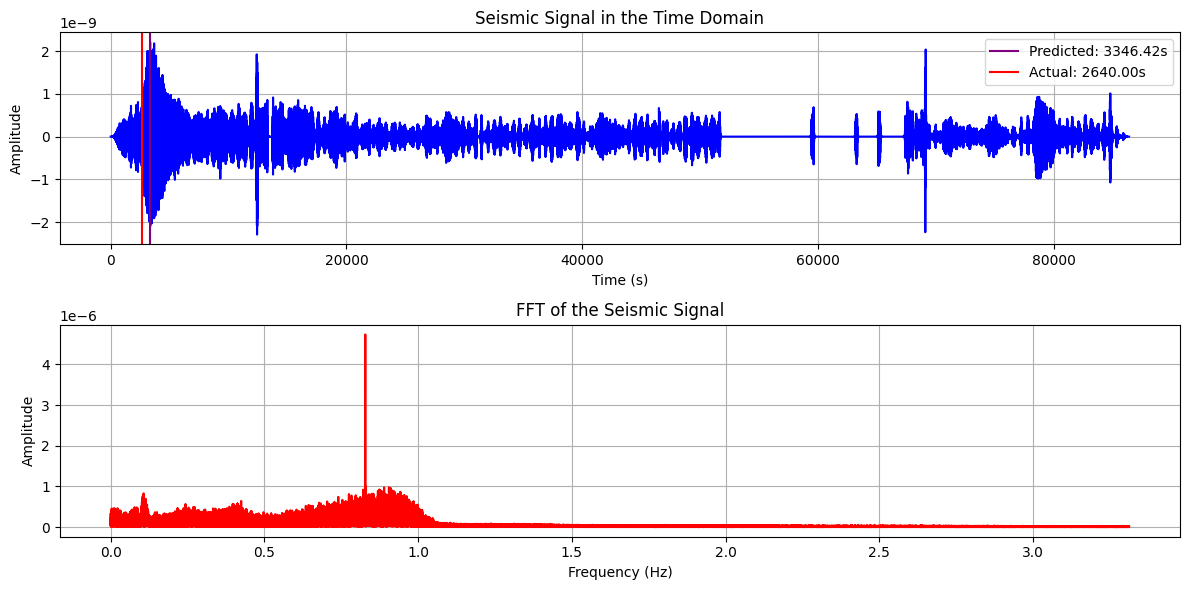

In [229]:
process_mseed_fft(st, FILE)

In [175]:
from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/My Drive/NASA Hackathon'

data_directory = '/content/partitioned_data/mseed'
output_directory = '/content/drive/My Drive/NASA Hackathon/data_fft/'


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/.shortcut-targets-by-id/1UMmU471yz6-G3Kaj_hpo8AOv1dRT_c5i/NASA Hackathon


In [241]:
deviations = []
for filename in os.listdir(data_directory):
    if filename.endswith('.mseed'):
        mseed_file = os.path.join(data_directory, filename)
        st = read(mseed_file)  # Read the seismic data
        file_no_ext = os.path.splitext(filename)[0]

        # copy paste all the code here
        FILE = file_no_ext
        FILE_PATH = '/content/partitioned_data/mseed/' + FILE + '.mseed'
        ROW_NUM = cat[cat['filename'] == FILE].index[0]

        process_mseed_fft(st, file_no_ext)

## Our model predicts the peak of the seismic activity, we want to know how back we should go to get the start

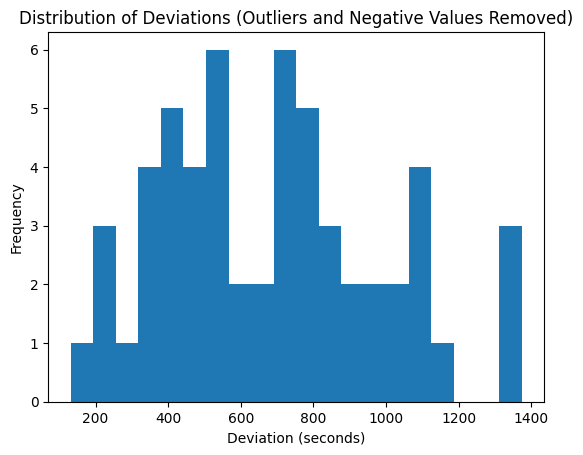

In [236]:
# prompt: remove outliers, then negative values from deviations list and then plot the distribution

import numpy as np
import matplotlib.pyplot as plt

# Remove outliers (using IQR method as an example)
Q1 = np.percentile(deviations, 25)
Q3 = np.percentile(deviations, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
deviations_no_outliers = [x for x in deviations if lower_bound <= x <= upper_bound]

# Remove negative values
deviations_positive = [x for x in deviations_no_outliers if x >= 0]


# Plot the distribution
plt.hist(deviations_positive, bins=20)
plt.xlabel("Deviation (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Deviations (Outliers and Negative Values Removed)")
plt.show()


In [238]:
# prompt: output expected value

# Calculate the mean of the deviations without outliers
mean_deviation = np.mean(deviations_no_outliers)

print(f"The expected value of the time deviations (without outliers) is: {mean_deviation:.4f} seconds")


The expected value of the time deviations (without outliers) is: 661.4564 seconds
